<a href="https://colab.research.google.com/github/KKhushhalR2405/Gender-Flask/blob/master/svm_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
cd /content/drive/MyDrive/gender_flask

/content/drive/MyDrive/gender_flask


In [2]:
data = np.load("/content/drive/MyDrive/gender_flask/dataset/data_pca50_y_mean.pickle.npz")

In [4]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [ ]:
#arr0 = x_pca
#arr1 = target
#arr2 = mean

In [5]:
x = data["arr_0"]
y=data["arr_1"]
mean = data["arr_2"]

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42) 

#y_train.shape

In [42]:
from sklearn.svm import SVC
s = SVC(C=1.0,kernel="rbf",gamma=0.01,probability=True)


In [43]:

try:
  s.fit(x_train,y_train)
  print("Model trained")
except:
  print("Error occured")

Model trained


In [44]:
s.score(x_train,y_train)

0.9252651880424301

In [45]:
s.score(x_test,y_test)

0.8923884514435696

Model Evaluation

In [46]:
from sklearn import metrics

In [47]:
y_pred = s.predict(x_test)
y_prob = s.predict_proba(x_test)

In [48]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[1219,  137, 1356],
       [ 150, 1161, 1311],
       [1369, 1298, 2667]])

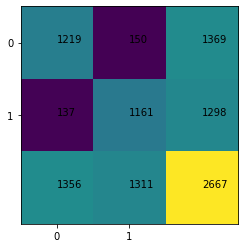

In [49]:
plt.imshow(cm)
for i in range(3):
  for j in range(3):
    plt.text(i,j,cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

In [50]:
#------------------##------------------#
#------------------##------------------#
#------------------##------------------#
#------------------##------------------#

In [51]:
cr = metrics.classification_report(y_test,y_pred,target_names=["male","female"],output_dict=True)

pd.DataFrame(cr)

,male,female,accuracy,macro avg,weighted avg
precision,0.890431,0.894453,0.892388,0.892442,0.892408
recall,0.898968,0.885584,0.892388,0.892276,0.892388
f1-score,0.894679,0.889996,0.892388,0.892338,0.892377
support,1356.000000,1311.000000,0.892388,2667.000000,2667.000000


In [52]:
metrics.cohen_kappa_score(y_test,y_pred)


0.7846801845480269

In [53]:
#----HEHE HEHE---#

#kappa score = 0.78 (>50%)

